# Exploring Neighborhoods in Karachi, Pakistan

## Table of Content
1. [Introduction](#intro)
2. [Data Collection](#dc)
3. [Methodology](#meth)
4. [Analysis](#ana)
5. [Results and Discussion](#rd)
6. [Conclusion](#conc)

## Introduction <a name="intro"></a>

This project aims to identify popular neighborhoods and explore its venues in Karachi, Pakistan which is based on their overall rating, its reviews and also its price ranges using Foursquare API and cluster the neighborhoods and venues to help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll identify places that are fit for various individuals based on the information collected from the API and Data Science. Once we have the plot neighborhoods with their venues, any company can launch an application using the same data and suggest users such information.

## Data Collection <a name="dc"></a>

According to our problem we need the following data:
* Borough
* Neighborhood
* Venues

Following data sources will be needed to extract/generate the required information:

Source : https://en.wikipedia.org/wiki/List_of_Union_Councils_of_Karachi

We will also fetch the data from APIs.
**Foursquare API:** We will use the Foursquare API to fetch venues in Karachi in the radius of 2 Kilometers on each neighborhood.

### Import Libraries

In [1]:
!pip install BeautifulSoup4

     |████████████████████████████████| 112kB 6.8MB/s eta 0:00:01


In [2]:
!pip install geocoder

     |████████████████████████████████| 102kB 5.8MB/s ta 0:00:011
     |████████████████████████████████| 829kB 23.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.7MB/s  eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


In [3]:
!pip install geopy

     |████████████████████████████████| 112kB 26.6MB/s eta 0:00:01


In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geocoder
from geopy.geocoders import Nominatim
import folium
from pandas.io.json import json_normalize
import matplotlib.cm as cm

First we will extract borough from the source because both borough and neighborhoods data are on different pages of the website. Then we will loop on the borough data and extract its neighborhood through scraping

In [2]:
#for extracting borough
source = requests.get('https://en.wikipedia.org/wiki/List_of_Union_Councils_of_Karachi').text
soup = BeautifulSoup(source,'lxml')
uc_tab = soup.find('div', class_='toc').ul
district = []
for lis in uc_tab.find_all('li',class_='toclevel-2'):
    district.append(lis.find('span', class_='toctext').text)
    
district[0:5] #display some

['Baldia Town', 'Bin Qasim Town', 'Gadap Town', 'Gulberg Town', 'Gulshan Town']

In [3]:
#now extracting neighborhood
town = []
districts = [] 
dist_and_town = {}
for dis_links in district:
    source2 = requests.get('https://en.wikipedia.org/wiki/{}'.format(dis_links)).text
    soup2 = BeautifulSoup(source2,'lxml')
    try:
        neigh_tab = soup2.find('div',class_='div-col columns column-width')
        for lis2 in neigh_tab.find_all('li'):
            town.append(lis2.text)
            districts.append(dis_links)
    except Exception as e:
        pass

dist_and_town = {'Districts':districts,'Town':town}

NameError: name 'district' is not defined

We will create dataframe from the scrape data

In [4]:
df_khi = pd.DataFrame(dist_and_town)
df_khi.head()

,Districts,Town
0,Bin Qasim Town,Abdullah Goth
1,Bin Qasim Town,Cattle Colony
2,Bin Qasim Town,Gaghar
3,Bin Qasim Town,Green Park City
4,Bin Qasim Town,Gulshan-e-Hadeed


In [5]:
df_khi.shape

(220, 2)

Some data also added manually

In [60]:
#read file
df_khi = pd.read_csv('karachi_district.csv')
df_khi.head()

,Districts,Town
0,Bin Qasim Town,Abdullah Goth
1,Bin Qasim Town,Cattle Colony
2,Bin Qasim Town,Gaghar
3,Bin Qasim Town,Green Park City
4,Bin Qasim Town,Gulshan-e-Hadeed


In [61]:
df_khi.shape

(294, 2)

**Find the Co-ordiantes of each Neighborhood**

In [11]:
latitude = []
longitude = []
for t_loc in df_khi['Town']: 
    address = '{},Karachi,Pakistan'.format(t_loc)
    geolocator = Nominatim(user_agent='khi_explorer')
    location = geolocator.geocode(address,timeout=1000)
    try:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        print('Latitude {} and Longitude {}'.format(latitude,longitude))
    except Exception as e:
        latitude.append("")
        longitude.append("")

Latitude [24.86654] and Longitude [67.2836719]
Latitude [24.86654, 24.8793108] and Longitude [67.2836719, 67.1987233]
Latitude [24.86654, 24.8793108, '', 24.8576588] and Longitude [67.2836719, 67.1987233, '', 67.2224746]
Latitude [24.86654, 24.8793108, '', 24.8576588, 24.869998799999998] and Longitude [67.2836719, 67.1987233, '', 67.2224746, 67.36005178758305]
Latitude [24.86654, 24.8793108, '', 24.8576588, 24.869998799999998, 24.79160805] and Longitude [67.2836719, 67.1987233, '', 67.2224746, 67.36005178758305, 67.14091644916715]
Latitude [24.86654, 24.8793108, '', 24.8576588, 24.869998799999998, 24.79160805, 24.8520926] and Longitude [67.2836719, 67.1987233, '', 67.2224746, 67.36005178758305, 67.14091644916715, 67.1864717]
Latitude [24.86654, 24.8793108, '', 24.8576588, 24.869998799999998, 24.79160805, 24.8520926, 24.9005091] and Longitude [67.2836719, 67.1987233, '', 67.2224746, 67.36005178758305, 67.14091644916715, 67.1864717, 67.103604]
Latitude [24.86654, 24.8793108, '', 24.85765

In [12]:
len(latitude)

294

In [13]:
len(longitude)

294

In [14]:
df_khi['Latitude'] = latitude
df_khi['Longitude'] = longitude
df_khi.head()

,Districts,Town,Latitude,Longitude
0,Bin Qasim Town,Abdullah Goth,24.8665,67.2837
1,Bin Qasim Town,Cattle Colony,24.8793,67.1987
2,Bin Qasim Town,Gaghar,,
3,Bin Qasim Town,Green Park City,24.8577,67.2225
4,Bin Qasim Town,Gulshan-e-Hadeed,24.87,67.3601


In [15]:
len(df_khi[df_khi['Latitude'] == ''])

81

In [16]:
df_khi.drop(df_khi[df_khi['Latitude'] == ""].index,axis=0,inplace=True)

In [17]:
len(df_khi[df_khi['Latitude'] == ''])

0

In [19]:
#df_khi.to_csv('karachi_lat_lng.csv',index=False)

In [52]:
df_khi = pd.read_csv('karachi_lat_lng.csv')
df_khi.head()

,Districts,Town,Latitude,Longitude
0,Bin Qasim Town,Abdullah Goth,24.866540,67.283672
1,Bin Qasim Town,Cattle Colony,24.879311,67.198723
2,Bin Qasim Town,Green Park City,24.857659,67.222475
3,Bin Qasim Town,Gulshan-e-Hadeed,24.869999,67.360052
4,Bin Qasim Town,Ibrahim Hyderi,24.791608,67.140916


In [53]:
df_khi.shape

(213, 4)

## folium

We can use the geopy library to extract the latitude and longitude values of karachi but it seems off and thus, we'll directly supply the values in this case.

Let's use the folium library to create a complete map of Karachi and its neighborhoods superimpose on them

In [74]:
map_khi = folium.Map(
    location=[24.9008, 67.1681], 
    zoom_start=10
)

In [76]:
map_khi

In [ ]:
for lat, lng, borough, neighborhood in zip(df_khi['Latitude'], df_khi['Longitude'], df_khi['Districts'], df_khi['Town']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_khi)  
    
map_khi

### Define Foursquare Credentials and Version

In [30]:
CLIENT_ID = 'YNHW0YK3AVH1W52ZVN5JBUXILERKT20M1FHTSURIKUBX44Q0' # your Foursquare ID
CLIENT_SECRET = 'I3VT2XGXAG34A4RQXAJCRBUI2ELJVQJLQXG5VST2OLIBZRJR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: YNHW0YK3AVH1W52ZVN5JBUXILERKT20M1FHTSURIKUBX44Q0
CLIENT_SECRET:I3VT2XGXAG34A4RQXAJCRBUI2ELJVQJLQXG5VST2OLIBZRJR


In [19]:
df_khi[df_khi['Town'] == 'Clifton'].index

Int64Index([202], dtype='int64')

In [20]:
neighborhood_latitude = df_khi['Latitude'][202] # neighborhood latitude value
neighborhood_longitude = df_khi['Longitude'][202] # neighborhood longitude value

neighborhood_name = df_khi['Town'][202] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Clifton are 24.8190552, 67.0262397.


In [21]:

LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 1000 # define radius




url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KAJZOUZF20UXDL2H3MOEBLTIHGQ2HK1PDJ14Z1R0QCAJCYVA&client_secret=UOJCAODP5HOBJS1W451QQ3JQ3HSAWPQ2TL2WWMCJXLFAYD33&v=20180605&ll=24.8190552,67.0262397&radius=1000&limit=100'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e82333eedbcad001ba82516'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Clifton',
  'headerFullLocation': 'Clifton, Karachi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 39,
  'suggestedBounds': {'ne': {'lat': 24.82805520900001, 'lng': 67.036137044161},
   'sw': {'lat': 24.810055190999993, 'lng': 67.01634235583901}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5fdbf6f964a520f9ce29e3',
       'name': 'Bar-B-Q Tonight',
       'location': {'address': 'Com 5/1, Sh-e-Firdousi, Boat Basin, Clifton Block-5',
        'crossStreet': 'Khayaban-e-Saadi, opp. Bilawal Chowrangi',
        'lat': 24.816200703197044,
        'lng

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues[filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

c:\users\aitezaz akhtar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,lat,lng
0,4b5fdbf6f964a520f9ce29e3,Bar-B-Q Tonight,BBQ Joint,24.816201,67.021181
1,4ba4e10ef964a52036be38e3,Mohatta Palace,History Museum,24.814550,67.032652
2,4dab1f0b1e72c1ab9c032a0b,Karachi Broast,Fast Food Restaurant,24.826819,67.026328
3,54c66c2c498e215fade90b7e,Tao - Pan Asian Cuisine,Asian Restaurant,24.827452,67.027946
4,4b8b3a6cf964a520919832e3,Boat Basin,Street Food Gathering,24.826821,67.025774


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

39 venues were returned by Foursquare.


###  Explore Each Neighborhood's Venues in Karachi

Create a function to extract the venues from each Neighborhood

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue ID','Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
khi_venues = getNearbyVenues(names=df_khi['Town'],
                                   latitudes=df_khi['Latitude'],
                                   longitudes=df_khi['Longitude']
                                  )


Abdullah Goth
Cattle Colony
Green Park City
Gulshan-e-Hadeed
Ibrahim Hyderi
Landhi Colony
Mujahid Colony
Quaidabad
Razzaqabad
Rehri Goth
Shah Latif Town
Sherpao Colony
Steel Town
Sindh Baloch Cooperative Housing Society
Essa Nagri
Gulshan-e-Iqbal I
Gulshan-e-Iqbal II
Gulzar-e-Hijri
Gulistan-e-Johar
Abbas Town
Jamali Colony
Metroville Colony
Pehlwan Goth
Safoora Goth
Shanti Nagar
Sachal Goth
KESC Society
Abyssinia Lines
Akhtar Colony
Azam Basti
Baloch Colony
Baltistani Society
Catholic Colony No. 1
Central Jacob Lines
Chanesar Goth
Defence View
Garden East
Garden West
Gulistan-e-Zafar
Jamshed Quarters
Mahmudabad
Manzoor Colony
Nursery
Pakistan Quarters
Patel Para
Sohrab Katrak Parsi Colony
Soldier Bazaar
Abdul Rehman Goth
Arbian
Darvesh Goth
Goth Lashkari
Goth Mohammad Ali
Goth Shaikhan
Gulshan-e-Sikandarabad
Haji Ali Goth
Jamali Goth
Machar Colony
Maripur
Masroor Colony
Mubarak Goth
Rais Goth
Rehman Goth
Salehabad
Sher Shah
Somar Goth
Sultanabad
Bilal Colony
Gulzar Colony
Hasrat Mohani

In [32]:
#khi_venues.to_csv('karachi_venues.csv',index=False)

In [5]:
khi_venues = pd.read_csv('karachi_venues.csv')

In [6]:
print(khi_venues.shape)
khi_venues.head()

(3113, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cattle Colony,24.879311,67.198723,4ca21645e44d6dcb4dde0375,Anwar Baloch,24.869620,67.200499,BBQ Joint
1,Cattle Colony,24.879311,67.198723,4dbadad51e72b351ca89bc12,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant
2,Cattle Colony,24.879311,67.198723,4fe5a492e4b02e4293b64533,Student Biryani,24.884636,67.182260,Restaurant
3,Cattle Colony,24.879311,67.198723,4ec2103893ad36d7aa12a7c5,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room
4,Cattle Colony,24.879311,67.198723,4ec785a0722e1437965e2e90,Liaquat Market,24.887072,67.183061,Market


In [7]:
#analysis
khi_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)

Neighborhood
Clifton               100
Mahmudabad            100
Bath Island           100
Shah Rasool Colony    100
Civil Lines            91
                     ... 
Razzaqabad              1
Qaim Khani              1
Landhi Colony           1
Majeed Colony           1
Mubarak Goth            1
Name: Venue, Length: 185, dtype: int64

We will first plot the venues data on the map.

In [82]:
map_khi_venues = folium.Map(
    location=[24.9008, 67.1681], 
    zoom_start=11
)

for lat,lng,name in zip(khi_venues['Venue Latitude'],khi_venues['Venue Longitude'],khi_venues['Venue']):
    label = name
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup=label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(map_khi_venues)

## rating

In [41]:
khi_venues['Venue ID'][500]

'4b89778df964a520073932e3'

In [35]:
def append_str(re):
    try:
        rating = re['rating']
    except:
        rating = 0
    try:
        tips = re['tips']['count']
    except:
        tips = 0
    try:
        price = re['price']['message']
    except:
        price = "Not listed"

    return rating,tips,price

In [42]:
venues_data = []
for v_id in khi_venues['Venue ID'].head(1):
    venue_id = '4b89778df964a520073932e3'   #4eb7057d1081376a2c5b5f05
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id,
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION
    )
    
    results = requests.get(url).json()
    #print(results['response']['venue']['rating'],results['response']['venue']['tips']['count'])
    venues_data.append(append_str(results['response']['venue']))

venues_data

[(5.7, 32, 'Cheap')]

In [22]:
vdf2 = pd.DataFrame(venues_data, columns=['Ratings','Tips','Price'])
vdf2.head()

,Ratings,Tips,Price
0,6.3,9,Cheap
1,6.4,2,Cheap
2,6.6,4,Not listed
3,6.0,1,Not listed
4,5.9,20,Cheap


In [23]:
vdf2.shape

(401, 3)

In [16]:
vdf = pd.DataFrame(venues_data, columns=['Ratings','Tips','Price'])
vdf

,Ratings,Tips,Price
0,7.1,13,Moderate
1,0.0,1,Cheap
2,0.0,0,Moderate
3,0.0,1,Moderate
4,0.0,3,Not listed
...,...,...,...
95,7.3,13,Cheap
96,6.7,5,Cheap
97,7.5,6,Cheap
98,7.8,6,Moderate


In [19]:
#vdf.to_csv('venues_detail.csv',index=False)

In [43]:
#vdf2.to_csv('venues_detail2.csv',index=False)

In [20]:
vdf.shape

(100, 3)

In [142]:
total_venues = vdf.append(vdf2)
total_venues

,Ratings,Tips,Price
0,7.1,13,Moderate
1,0.0,1,Cheap
2,0.0,0,Moderate
3,0.0,1,Moderate
4,0.0,3,Not listed
...,...,...,...
396,6.0,17,Cheap
397,0.0,1,Not listed
398,5.6,8,Not listed
399,0.0,0,Not listed


In [143]:
total_venues.shape

(501, 3)

In [144]:
#total_venues.to_csv('total_venues.csv',index=False)

In [8]:
total_venues = pd.read_csv("total_venues.csv")

In [9]:
total_venues.head()

,Ratings,Tips,Price
0,7.1,13,Moderate
1,0.0,1,Cheap
2,0.0,0,Moderate
3,0.0,1,Moderate
4,0.0,3,Not listed


In [10]:
selected_venues = total_venues[(total_venues['Ratings'] != 0) & (total_venues['Price'] != "Not listed") & (total_venues['Tips'] != 0.0)]
selected_venues

,Ratings,Tips,Price
0,7.1,13,Moderate
17,8.6,5,Cheap
18,7.5,2,Cheap
19,7.3,8,Cheap
20,7.6,3,Cheap
...,...,...,...
490,6.0,2,Cheap
491,6.0,17,Cheap
494,5.7,3,Cheap
496,6.0,17,Cheap


In [11]:
selected_venues.shape

(247, 3)

In [12]:
selected_venues.sort_values(by="Ratings",ascending=False,inplace=True)
selected_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ratings,Tips,Price
420,8.7,17,Cheap
216,8.6,5,Cheap
17,8.6,5,Cheap
178,8.6,5,Cheap
125,8.6,5,Cheap


In [13]:
selected_venues.reset_index(drop=True,inplace=True)
selected_venues

,Ratings,Tips,Price
0,8.7,17,Cheap
1,8.6,5,Cheap
2,8.6,5,Cheap
3,8.6,5,Cheap
4,8.6,5,Cheap
...,...,...,...
242,5.7,3,Cheap
243,5.7,32,Cheap
244,5.6,1,Cheap
245,5.6,7,Moderate


In [14]:
khi_merged = khi_venues.join(selected_venues)
khi_merged.drop('Venue ID',axis=1,inplace=True)
khi_merged = khi_merged[0:247]
khi_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratings,Tips,Price
0,Cattle Colony,24.879311,67.198723,Anwar Baloch,24.869620,67.200499,BBQ Joint,8.7,17.0,Cheap
1,Cattle Colony,24.879311,67.198723,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant,8.6,5.0,Cheap
2,Cattle Colony,24.879311,67.198723,Student Biryani,24.884636,67.182260,Restaurant,8.6,5.0,Cheap
3,Cattle Colony,24.879311,67.198723,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room,8.6,5.0,Cheap
4,Cattle Colony,24.879311,67.198723,Liaquat Market,24.887072,67.183061,Market,8.6,5.0,Cheap


In [15]:
khi_merged.shape

(247, 10)

## Analysis <a name="ana"></a>

The complete dataset is now in its final form.

We will now analyze venues based on their rating. The rating of a venue are based on user reviews and belongs to a range from 1 to 10. We'll also analyse the venues based on their range.

We have different types of venues in each neighborhood. We will take a look at the venues and check which are the majority venue neighborhood in the list.

### Most Venues

In [16]:
khi_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False).to_frame().head()

,Venue
Neighborhood,
Clifton,100
Mahmudabad,100
Bath Island,100
Shah Rasool Colony,100
Civil Lines,91


From the above result we can clearly see that **Clifton, Mahmudabad and Bath Island** has most values in the list. So, if you are a tourist, you may find many places to enjoy there

### Categories

Now we will take a look at the venues and check how many unique venue categories are and which are the majority venue categories in the list.

In [17]:
print('There are {} uniques venue categories.'.format(len(khi_venues['Venue Category'].unique())))

There are 150 uniques venue categories.


In [18]:
khi_venues['Venue Category'].value_counts().to_frame().head(5)

,Venue Category
Fast Food Restaurant,289
Market,148
Pizza Place,136
BBQ Joint,132
Bakery,130


As we can see most of the venues are of Fast Food Restaurant. We also visualize it.

Text(0.5, 1.0, 'Count each venue category')

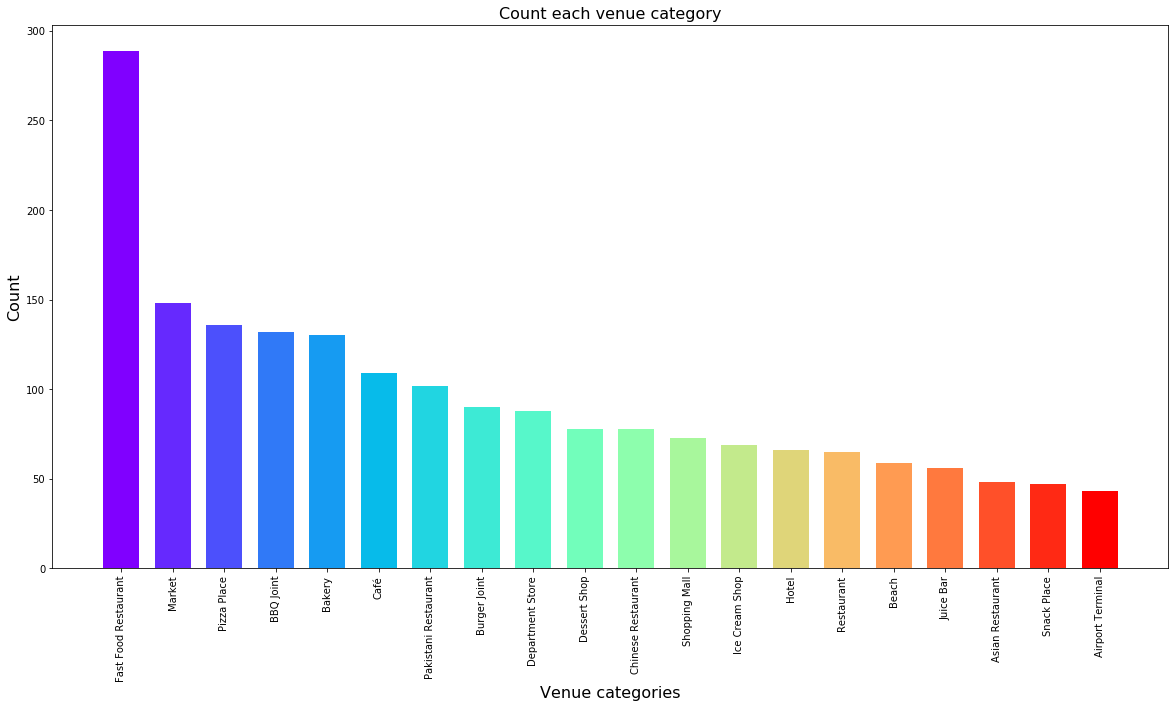

In [19]:
cat_dis = khi_venues['Venue Category'].value_counts().head(20) 
plt.figure(figsize = (20,10))
colors = cm.rainbow(np.linspace(0, 1, len(cat_dis.index)))
plt.xticks(rotation = 90)
plt.bar(cat_dis.index,cat_dis.values,color = colors,width=0.7)
plt.xlabel("Venue categories", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count each venue category", fontsize = 16)

We can also see from visualization that Fast Food Restaurant category venues are here the most

### Ratings

Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place.
We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

In [20]:
khi_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratings,Tips,Price
0,Cattle Colony,24.879311,67.198723,Anwar Baloch,24.869620,67.200499,BBQ Joint,8.7,17.0,Cheap
1,Cattle Colony,24.879311,67.198723,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant,8.6,5.0,Cheap
2,Cattle Colony,24.879311,67.198723,Student Biryani,24.884636,67.182260,Restaurant,8.6,5.0,Cheap
3,Cattle Colony,24.879311,67.198723,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room,8.6,5.0,Cheap
4,Cattle Colony,24.879311,67.198723,Liaquat Market,24.887072,67.183061,Market,8.6,5.0,Cheap


In [21]:
khi_merged[['Venue','Venue Latitude','Venue Longitude','Venue Category','Ratings','Tips','Price']].head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratings,Tips,Price
0,Anwar Baloch,24.869620,67.200499,BBQ Joint,8.7,17.0,Cheap
1,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant,8.6,5.0,Cheap
2,Student Biryani,24.884636,67.182260,Restaurant,8.6,5.0,Cheap
3,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room,8.6,5.0,Cheap
4,Liaquat Market,24.887072,67.183061,Market,8.6,5.0,Cheap


We can see that Anwar Baloch has highest rating so this might be the place you have to visit

We can also analyze which neighborhood has highest rating restaurant

In [22]:
khi_merged.groupby('Neighborhood')['Ratings'].mean().sort_values(ascending=False).to_frame()[0:5]

,Ratings
Neighborhood,
Cattle Colony,8.477778
Green Park City,8.200000
Gulshan-e-Hadeed,8.200000
Landhi Colony,7.900000
Ibrahim Hyderi,7.900000


Here we can see that Cattle Colony has the highest rating restaurant 

Text(0.5, 1.0, 'Count each venue category')

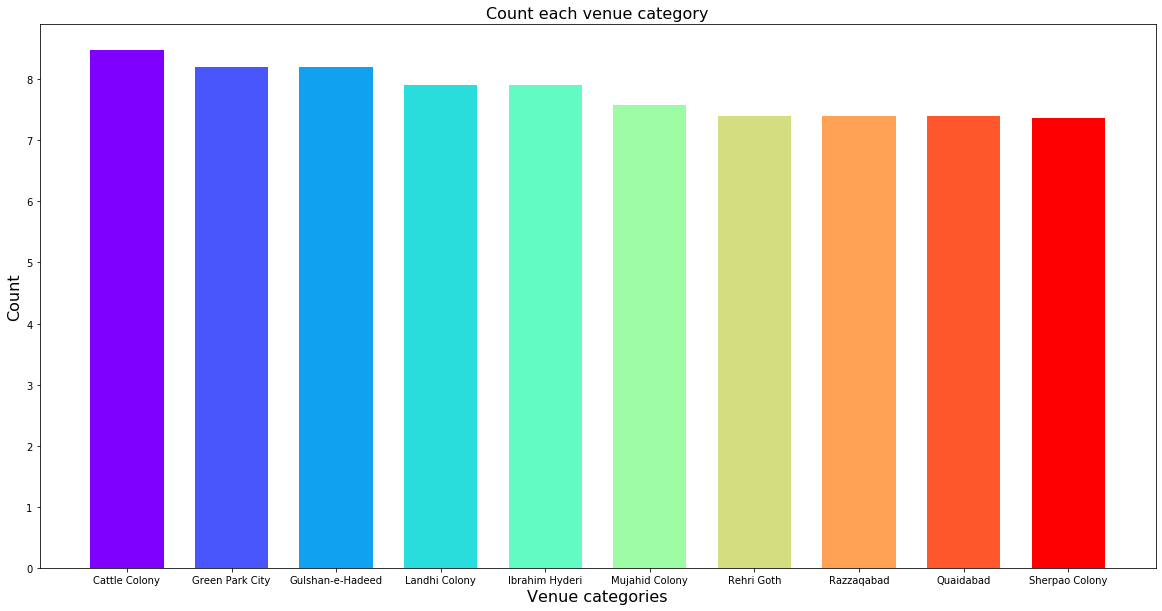

In [26]:
# cat_dis = khi_venues['Venue Category'].value_counts().head(20) 
cat_dis = khi_merged.groupby('Neighborhood')['Ratings'].mean().sort_values(ascending=False).to_frame()[0:10]
plt.figure(figsize = (20,10))
colors = cm.rainbow(np.linspace(0, 1, len(cat_dis.index)))
plt.bar(cat_dis.index,khi_merged.groupby('Neighborhood')['Ratings'].mean().sort_values(ascending=False)[0:10].values,color = colors,width=0.7)
plt.xlabel("Venue categories", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count each venue category", fontsize = 16)

### Price

In [28]:
khi_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratings,Tips,Price
0,Cattle Colony,24.879311,67.198723,Anwar Baloch,24.869620,67.200499,BBQ Joint,8.7,17.0,Cheap
1,Cattle Colony,24.879311,67.198723,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant,8.6,5.0,Cheap
2,Cattle Colony,24.879311,67.198723,Student Biryani,24.884636,67.182260,Restaurant,8.6,5.0,Cheap
3,Cattle Colony,24.879311,67.198723,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room,8.6,5.0,Cheap
4,Cattle Colony,24.879311,67.198723,Liaquat Market,24.887072,67.183061,Market,8.6,5.0,Cheap


In [30]:
khi_merged["Price"].unique()

array(['Cheap', 'Moderate', 'Very Expensive'], dtype=object)

We will now take a look the venues based on the price values. We have three price features for our venues, Cheap, Moderate and Very Expensive according to Foursquare API

Now we map the cheap restaurant in map

In [83]:
khi_merged_dum = khi_merged[0:40]

Users might also be interested in going to a place that fits in their budget. We will use the **Price** column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.

In [84]:
color_map = {'Cheap': 'green', 'Moderate': 'yellow', 'Very Expensive': 'red'}
for name, lat, lng, price in zip(khi_merged_dum["Venue"],khi_merged_dum["Venue Latitude"],khi_merged_dum["Venue Longitude"],khi_merged_dum["Price"]):
    label = '{}'.format(name)
    label = folium.Popup(label,parse_html=True)
    folium.Marker(
        [lat,lng],
        icon = folium.Icon(color = color_map[price]),
        popup = label
    ).add_to(map_khi)

map_khi

In [142]:
khi_merged[khi_merged["Price"] == "Cheap"].groupby('Neighborhood')["Price"].value_counts().sort_values(ascending=False).to_frame().head(10)

,,Price
Neighborhood,Price,
Gulshan-e-Iqbal I,Cheap,29
Mujahid Colony,Cheap,29
Shanti Nagar,Cheap,28
Gulistan-e-Johar,Cheap,17
Gulshan-e-Iqbal II,Cheap,17
Jamali Colony,Cheap,16
Essa Nagri,Cheap,12
Gulzar-e-Hijri,Cheap,8
Cattle Colony,Cheap,6


We can see that most of the cheap restaurants are found in Gulshan-e-Iqbal, Mujahid Colony

### Clustering

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [185]:
from sklearn.cluster import KMeans

In [196]:
kcluster = 2

khi_cluster = khi_merged[['Price',"Ratings","Tips"]]

In [197]:
khi_cluster.head()

,Price,Ratings,Tips
0,Cheap,8.7,17.0
1,Cheap,8.6,5.0
2,Cheap,8.6,5.0
3,Cheap,8.6,5.0
4,Cheap,8.6,5.0


In [198]:
khi_cluster['Price'].replace(to_replace=["Cheap","Moderate","Very Expensive"], value=[0,1,2],inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [199]:
kmeans = KMeans(n_clusters=kcluster, random_state=0).fit(khi_cluster)

In [200]:
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [201]:
khi_merged.insert(0,"Cluster Labels",kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [202]:
khi_merged.head()

,Neighborhood,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Ratings,Tips,Price
0,Cattle Colony,0,24.879311,67.198723,Anwar Baloch,24.869620,67.200499,BBQ Joint,8.7,17.0,Cheap
1,Cattle Colony,0,24.879311,67.198723,The Broast Restaurant,24.884536,67.182993,Fast Food Restaurant,8.6,5.0,Cheap
2,Cattle Colony,0,24.879311,67.198723,Student Biryani,24.884636,67.182260,Restaurant,8.6,5.0,Cheap
3,Cattle Colony,0,24.879311,67.198723,Taj Chaiye Ka Hotel,24.887062,67.183052,Tea Room,8.6,5.0,Cheap
4,Cattle Colony,0,24.879311,67.198723,Liaquat Market,24.887072,67.183061,Market,8.6,5.0,Cheap


Finally, let's visualize the resulting clusters

In [203]:
map_cluster = folium.Map(location=[24.8607, 67.0011], zoom_start=12)

In [204]:
color_map = { 0: 'green', 1: 'red'}

for lat,lng, venue, cluster in zip(khi_merged["Venue Latitude"],khi_merged["Venue Longitude"],khi_merged["Venue"],khi_merged["Cluster Labels"]):
    label = folium.Popup(str(venue) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color = color_map[cluster],
        fill=True,
        fill_color = color_map[cluster],
        fill_opacity=0.7).add_to(map_cluster)
       
map_cluster

### Examine Clusters

In [ ]:
khi_merged[khi_merged["Cluster "]]